[stats]
 avg: 10.02 std: 3.75


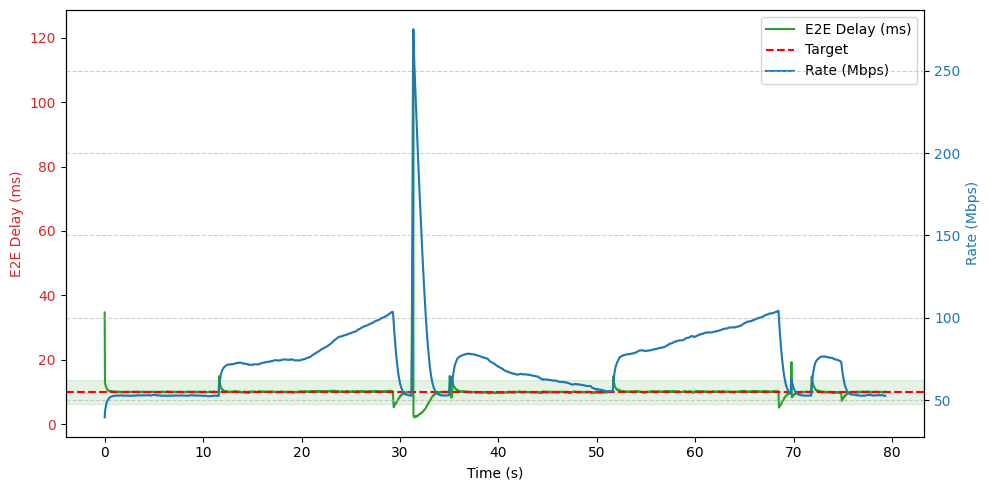

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

filename = "pid_log.csv" 
data = pd.read_csv(filename)


time = (data["timestamp"] - data["timestamp"].iloc[0]) /1e9


fig, ax1 = plt.subplots(figsize=(10, 5))

# Eje izquierdo: delay
ax1.plot(time,  data["delay_ms"], color='tab:green', label="E2E Delay (ms)")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("E2E Delay (ms)", color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
print("[stats]")
avg = np.mean(data["delay_ms"])
std = np.std(data["delay_ms"])
print(f" avg: {avg:.2f} std: {std:.2f}")
# ax1.axhline(np.mean(data["delay_ms"]), ls='--', c='g', label="E2E avg")
ax1.axhline(10, ls="--", c='red', label="Target")
ax1.axhspan(avg-std, avg+std, alpha=0.1, color="g")

# Eje derecho: rate
ax2 = ax1.twinx()
ax2.plot(time, data["rate_Mbps"], color='tab:blue', label="Rate (Mbps)")
ax2.set_ylabel("Rate (Mbps)", color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
# ax2.set_ylim(40, 80)
# ax1.set_xlim(1,4)
# ax1.set_ylim(5,15)
# plt.title("E2E Delay and PID-Controlled Rate Evolution")
plt.grid(True, linestyle="--", alpha=0.6)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper right")
plt.tight_layout()

plt.show()




[stats]
 avg: 28.42 std: 4.78
 avg. rate: 10.0


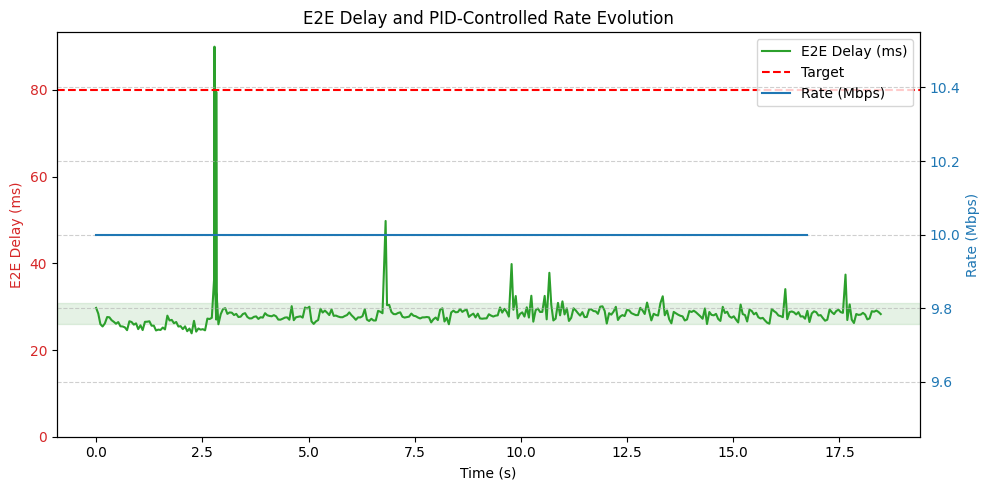

In [277]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ref = 80
init = 0
end =  -1


# filename_rate = "../pid_results/pid_now_bkground/xappsensectrl_chann.txt" 
# filename_delays = "../pid_results/pid_now_bkground/xappsensectrl_dels.txt" 
# filename_slot_dels = "../pid_results/pid_now_bkground/xappsensectrl_slot_lat.txt"

filename_rate = "../pid_results/xappsensectrl_chann.txt" 
filename_delays = "../pid_results/xappsensectrl_dels.txt" 
filename_slot_dels = "../pid_results/xappsensectrl_slot_lat.txt"
# filename_rate = "../xappsensectrl_chann.txt" 
# filename_delays = "../xappsensectrl_dels.txt" 
# filename_slot_dels = "../xappsensectrl_slot_lat.txt"
data_rate = pd.read_csv(filename_rate, sep="\t", names=["timestamp", "rate_Mbps"])
data_dels = pd.read_csv(filename_delays, sep="\t", names=["timestamp", "delay_ms"])
# data_dels_slot = pd.read_csv(filename_slot_dels, sep="\t", names=["timestamp", "delay_ms"])

time_rate = (data_rate["timestamp"] - data_dels["timestamp"].iloc[0]) /1e6
time_dels = (data_dels["timestamp"] - data_dels["timestamp"].iloc[0]) /1e6
negative_dels = np.sum(data_dels["delay_ms"] < 0)

neg_delays = np.mean(data_dels["delay_ms"] < 0) 

if (negative_dels > 1):
    print(f"Number of negative delay values: {negative_dels}/{len(data_dels)}")
    print(f"offset: {neg_delays}")



fig, ax1 = plt.subplots(figsize=(10, 5))

# Eje izquierdo: delay
# Eje izquierdo: delay
ax1.plot(time_dels[init:end], data_dels["delay_ms"][init:end], color='tab:green', label="E2E Delay (ms)")
# ax1.plot(time_rate[init:end], data_dels_slot["delay_ms"][init:end], color='black', label="E2E Delay (slot)")

ax1.set_xlabel("Time (s)")
ax1.set_ylabel("E2E Delay (ms)", color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
print("[stats]")
avg = np.mean(data_dels["delay_ms"])
std = np.std(data_dels["delay_ms"])
print(f" avg: {avg:.2f} std: {std:.2f}")
# ax1.axhline(np.mean(data["delay_ms"]), ls='--', c='g', label="E2E avg")
ax1.axhline(ref, ls="--", c='red', label="Target")
ax1.axhspan(avg-std/2, avg+std/2, alpha=0.1, color="g")
ax1.set_ylim(0)
# Eje derecho: rate
ax2 = ax1.twinx()
ax2.step(time_rate[init:end], data_rate["rate_Mbps"][init:end], color='tab:blue', label="Rate (Mbps)")
ax2.set_ylabel("Rate (Mbps)", color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
# ax2.set_ylim(40, 80)
# ax1.set_xlim(1,4)
# ax1.set_ylim(5,15)
plt.title("E2E Delay and PID-Controlled Rate Evolution")
plt.grid(True, linestyle="--", alpha=0.6)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()


ax1.legend(lines + lines2, labels + labels2, loc="upper right")
plt.tight_layout()


print(f" avg. rate: {np.mean(data_rate["rate_Mbps"][0:end])}")


plt.show()

[stats]
 avg: 42.47 std: 3.48


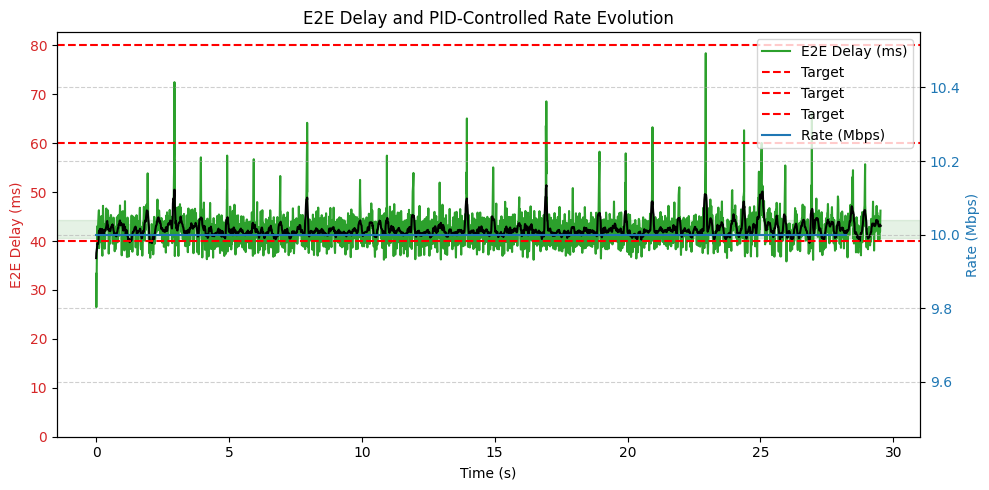

In [252]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ref = 80
init = 0
end =  -1


filename_rate = "../pid_results/xappsensectrl_chann.txt" 
filename_delays = "../pid_results/xappsensectrl_dels.txt" 
filename_slot_dels = "../pid_results/xappsensectrl_slot_lat.txt"


# filename_rate = "../xappsensectrl_chann.txt" 
# filename_delays = "../xappsensectrl_dels.txt" 
# filename_slot_dels = "../xappsensectrl_slot_lat.txt"
data_rate = pd.read_csv(filename_rate, sep="\t", names=["timestamp", "rate_Mbps"])
data_dels = pd.read_csv(filename_delays, sep="\t", names=["timestamp", "delay_ms"])
# data_dels_slot = pd.read_csv(filename_slot_dels, sep="\t", names=["timestamp", "delay_ms"])

time_rate = (data_rate["timestamp"] - data_dels["timestamp"].iloc[0]) /1e6
time_dels = (data_dels["timestamp"] - data_dels["timestamp"].iloc[0]) /1e6
negative_dels = np.sum(data_dels["delay_ms"] < 0)

neg_delays = np.mean(data_dels["delay_ms"] < 0) 

if (negative_dels > 1):
    print(f"Number of negative delay values: {negative_dels}/{len(data_dels)}")
    print(f"offset: {neg_delays}")



fig, ax1 = plt.subplots(figsize=(10, 5))

# Eje izquierdo: delay
# Eje izquierdo: delay
ax1.plot(time_dels[init:end], data_dels["delay_ms"][init:end], color='tab:green', label="E2E Delay (ms)")
# ax1.plot(time_rate[init:int(end/20)], data_dels_slot["delay_ms"][init:int(end/20)], color='black', label="E2E Delay (slot)")

data_dels["delay_smooth"] = data_dels["delay_ms"].rolling(window=10, min_periods=1, center=True).mean()
ax1.plot(time_dels, data_dels["delay_smooth"], color ='black')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("E2E Delay (ms)", color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
print("[stats]")
avg = np.mean(data_dels["delay_ms"])
std = np.std(data_dels["delay_ms"])
print(f" avg: {avg:.2f} std: {std:.2f}")
# ax1.axhline(np.mean(data["delay_ms"]), ls='--', c='g', label="E2E avg")
ax1.axhline(80, ls="--", c='red', label="Target")
ax1.axhline(60, ls="--", c='red', label="Target")
ax1.axhline(40, ls="--", c='red', label="Target")
# ax1.step([0, 20, 40, 80], [80, , 80], ls="--", c='red', label="Target")
ax1.axhspan(avg-std/2, avg+std/2, alpha=0.1, color="g")
ax1.set_ylim(0)
# Eje derecho: rate
ax2 = ax1.twinx()
ax2.step(time_rate[init:end], data_rate["rate_Mbps"][init:end], color='tab:blue', label="Rate (Mbps)")
ax2.set_ylabel("Rate (Mbps)", color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
# ax2.set_ylim(40, 80)
# ax1.set_xlim(1,4)
# ax1.set_ylim(5,15)
plt.title("E2E Delay and PID-Controlled Rate Evolution")
plt.grid(True, linestyle="--", alpha=0.6)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()


ax1.legend(lines + lines2, labels + labels2, loc="upper right")
plt.tight_layout()

data_dels.to_csv("../pid_results/new_dels.txt", sep="\t", index=False, float_format="%.3f")

plt.show()

/tmp/ipykernel_35181/2896024811.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=sorted_times, showfliers =False, showmeans=True)


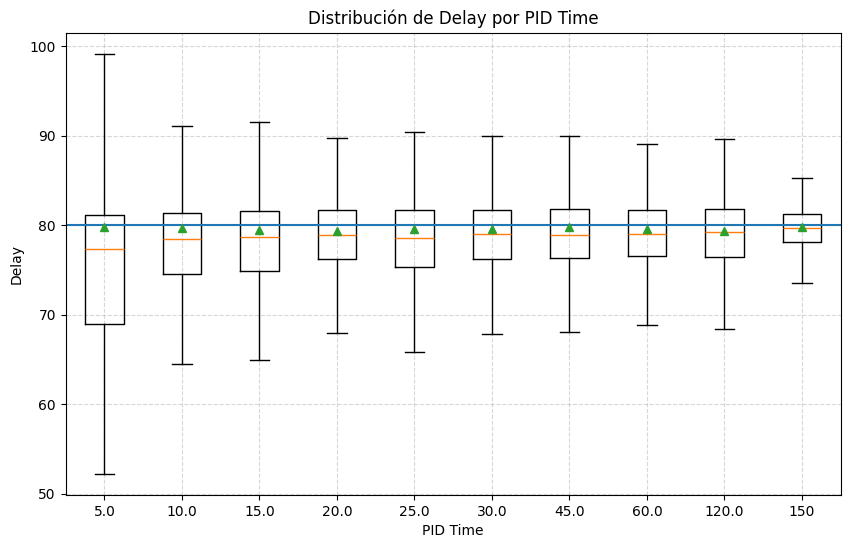

In [982]:
import os
import pandas as pd
import matplotlib.pyplot as plt


base_path = "../pid_results/"  

# Diccionario para guardar delays por "time"
delays_por_time = {}

# Recorremos las subcarpetas dentro de pid_results
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)

    # Verificamos que sea carpeta y siga el patrón "pid_{time}_periods"
    if os.path.isdir(folder_path) and folder.startswith("pid_") and folder.endswith("_periods"):
        try:
           
            time_value = float(folder.split("pid_")[1].split("_periods")[0])
        except ValueError:
         
            continue

        # Buscamos un archivo CSV dentro de la carpeta
        for file in os.listdir(folder_path):
            if file.endswith("dels.txt"):
                file_path = os.path.join(folder_path, file)
                df = pd.read_csv(file_path, sep="\t", names=["ts", "delay"])

               
                delays_por_time[time_value] = df["delay"]

df = pd.read_csv("../pid_results/pid_now_bkground/xappsensectrl_dels.txt", sep="\t", names=["ts", "delay"])              
delays_por_time[150] = df["delay"]
# Si hay datos, graficamos
if delays_por_time:
    # Ordenamos por valor de time
    sorted_times = sorted(delays_por_time.keys())
    data = [delays_por_time[t] for t in sorted_times]

    # Creamos boxplot con matplotlib
    plt.figure(figsize=(10, 6))
    plt.boxplot(data, labels=sorted_times, showfliers =False, showmeans=True)
    plt.axhline(80)
    plt.title("Distribución de Delay por PID Time")
    plt.xlabel("PID Time")
    plt.ylabel("Delay")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()



/tmp/ipykernel_4033/912229840.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=sorted_times, showfliers =False, showmeans=True)


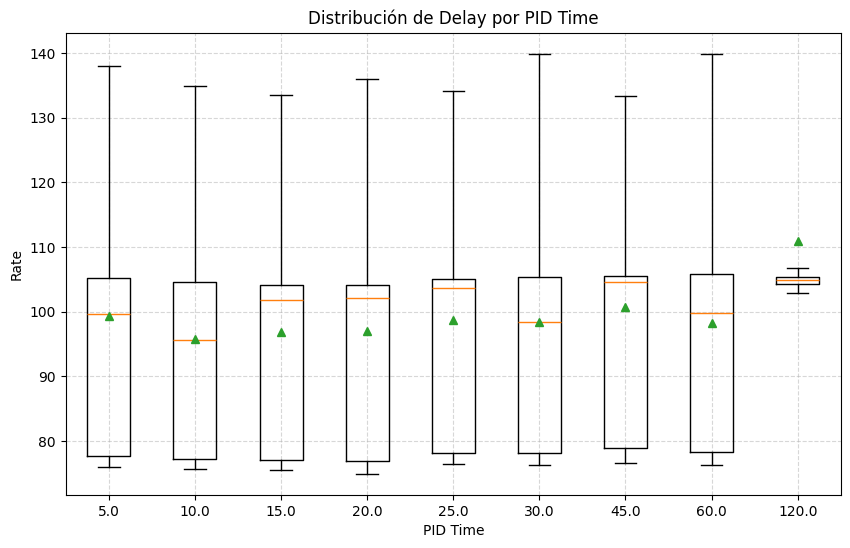

[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]


In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Ruta principal donde están las subcarpetas
base_path = "../pid_results/"  # <-- cámbiala por tu ruta real

# Diccionario para guardar delays por "time"
delays_por_time = {}

# Recorremos las subcarpetas dentro de pid_results
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)

    # Verificamos que sea carpeta y siga el patrón "pid_{time}_periods"
    if os.path.isdir(folder_path) and folder.startswith("pid_") and folder.endswith("_periods"):
        try:
           
            time_value = float(folder.split("pid_")[1].split("_periods")[0])
        except ValueError:
         
            continue

        # Buscamos un archivo CSV dentro de la carpeta
        for file in os.listdir(folder_path):
            if file.endswith("chann.txt"):
                file_path = os.path.join(folder_path, file)
                df = pd.read_csv(file_path, sep="\t", names=["ts", "delay"])

               
                delays_por_time[time_value] = df["delay"]

# df = pd.read_csv("../pid_results/pid_now_bkground/xappsensectrl_dels.txt", sep="\t", names=["ts", "delay"])              
# delays_por_time[150] = df["delay"]
# Si hay datos, graficamos
if delays_por_time:
    # Ordenamos por valor de time
    sorted_times = sorted(delays_por_time.keys())
    data = [delays_por_time[t] for t in sorted_times]
   
    # Creamos boxplot con matplotlib
    plt.figure(figsize=(10, 6))
    plt.boxplot(data, labels=sorted_times, showfliers =False, showmeans=True)

    plt.title("Distribución de Delay por PID Time")
    plt.xlabel("PID Time")
    plt.ylabel("Rate")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

print([min(delays_por_time[t]) for t in sorted_times])

In [978]:
import numpy as np
import pandas as pd

# Lista donde iremos acumulando los resultados
stats_data = []

for time in sorted(delays_por_time.keys()):
    data = delays_por_time[time].dropna().values
    q1 = np.percentile(data, 25)
    median = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_whisker = np.min(data[data >= q1 - 1.5 * iqr])
    upper_whisker = np.max(data[data <= q3 + 1.5 * iqr])
    mean = np.mean(data)

    stats_data.append({
        "PID_time": time,
        "lower_whisker": lower_whisker,
        "lower_quartile": q1,
        "median": median,
        "upper_quartile": q3,
        "upper_whisker": upper_whisker,
        "mean": mean
    })

# Convertimos a DataFrame
stats_df = pd.DataFrame(stats_data)

# Guardamos como CSV (o TXT con tabulación)
output_path = "boxplot_dataset.txt"
stats_df.to_csv(output_path, sep="\t", index=False, float_format="%.4f")

